## Copyright 2021 Parker Dunn parker_dunn@outlook.com
  
#### (Alternative: pgdunn@bu.edu | pdunn91@gmail.com)   
#### June 5th, 2021

### Codecademy - Election Results Project

Skill Path: Analyze Data with Python  
Section: Numpy - A Python Library for Statistics  
Topic: Statistics in NumPy

This was the project that came after CrunchieMunchies in this learning path on Codecademy. The project is meast to focus on new material related to more introductory material about Numpy as well as some material on statistical distributions.  

__Description of Project__: "You are part of an impartial research group that conducts phone surveys prior to local elections. During this election season, the group conducted a survey to determine how many people would vote for Cynthia Ceballos vs Justin Kerrigan in the mayoral election.  

Now that the election has occured, your group wants to compare the survey responses to the actual results.  

Was your survey a good indicator?

The contents of "import codecademylib" are not provided, but my best guess is that it contains some basic features of Python, which might not have been included in the online Codecademy environment without importing the codecademylib. The module has been included in the past as well to allow the inclusion of files, so it may have been included as a template for the Codecademy projects.
  


In [3]:
# import codecademylib
import numpy as np
from matplotlib import pyplot as plt

survey_responses = ['Ceballos', 'Kerrigan', 'Ceballos', 'Ceballos', 'Ceballos','Kerrigan', 'Kerrigan', 'Ceballos', 'Ceballos', 'Ceballos', 
'Kerrigan', 'Kerrigan', 'Ceballos', 'Ceballos', 'Kerrigan', 'Kerrigan', 'Ceballos', 'Ceballos', 'Kerrigan', 'Kerrigan', 'Kerrigan', 'Kerrigan', 'Kerrigan', 'Kerrigan', 'Ceballos', 'Ceballos', 'Ceballos', 'Ceballos', 'Ceballos', 'Ceballos',
'Kerrigan', 'Kerrigan', 'Ceballos', 'Ceballos', 'Ceballos', 'Kerrigan', 'Kerrigan', 'Ceballos', 'Ceballos', 'Kerrigan', 'Kerrigan', 'Ceballos', 'Ceballos', 'Kerrigan', 'Kerrigan', 'Kerrigan', 'Kerrigan', 'Kerrigan', 'Kerrigan', 'Ceballos',
'Kerrigan', 'Kerrigan', 'Ceballos', 'Ceballos', 'Ceballos', 'Kerrigan', 'Kerrigan', 'Ceballos', 'Ceballos', 'Kerrigan', 'Kerrigan', 'Ceballos', 'Ceballos', 'Kerrigan', 'Kerrigan', 'Kerrigan', 'Kerrigan', 'Kerrigan', 'Kerrigan', 'Ceballos']

# This was used as a quick reminder for myself about how Python lists can be used - been scripting in C++ doesn't work quite as smoothly ... I think
# ceballos_list = [1 for candidate in survey_responses if candidate == "Ceballos"]
# print(ceballos_list)

total_ceballos = sum([1 for candidate in survey_responses if candidate == "Ceballos"])
print(total_ceballos)

33


In [5]:
# This was my original approach, which seems beneficial in the long-term
responses_array = np.array(survey_responses)
percentage_ceballos = np.mean(responses_array == "Ceballos")
print("Percentage of 'Ceballos' responses: {0}\n".format(percentage_ceballos * 100))

# The hint approach from Codecademy
percentage_ceballos_2 = 100.0 * (float(total_ceballos)/ len(survey_responses))
print("Attempt 2: Percentage of 'Ceballos' responses: {0}".format(percentage_ceballos_2))

Percentage of 'Ceballos' responses: 47.14285714285714

Attempt 2: Percentage of 'Ceballos' responses: 47.14285714285714


The second method (suggested by Codecademy) is a bit of a faster method in the shorter term. Certainly, worth remembering.  

The second method does suffer a bit from having to account for types if you aren't careful with the placement of the parenthesis though. No parenthesis ends up being the simplest option actually.

Something to keep in mind: "numpy" handles type issues (int rounding vs floats vs doubles) better than a traditional coding approach

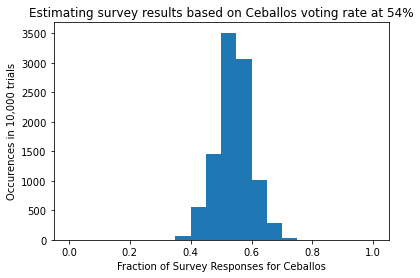


From the binomial sample, 20.849999999999998% of surveys had Ceballos losing the majority vote (i.e. <50%)

[False False False ... False False False]

From the new binomial sample (7000 people surveyed), 0.0% of surveys had Ceballos losing the majority vote.



In [7]:
# "Checking" the poll results above vs "actual" data provided with problem
# Real election voting rate for "Ceballos" = 54%
# Town population: 10,000 (i.e. number of voters)
N = len(survey_responses)
possible_surveys = np.random.binomial(N, 0.54, size = 10000) / float(N)
# Divide by N to get fraction of the survey that voted for "Ceballos" using a 54% "true" voting rate for Ceballos

# The use of the town's population as the "size"/"number of trials" doesn't make much in my opinion, but it was the instruction.
# Seems like it would make more sense to use a value that nearly guarunteed that everyone in the town was surveyed at least once. Althought I'm not sure if that's something that can easily be calculated right now.

plt.hist(possible_surveys, bins = 20, range = (0,1))
plt.xlabel("Fraction of Survey Responses for Ceballos")
plt.ylabel("Occurences in 10,000 trials")
plt.title("Estimating survey results based on Ceballos voting rate at 54%")
plt.show()

ceballos_loss_surveys = np.mean(possible_surveys < .5)
print("\nFrom the binomial sample, {0}% of surveys had Ceballos losing the majority vote (i.e. <50%)\n".format(ceballos_loss_surveys * 100))

# Obviously, sampling 70 people is not a great sample size, so the assignment was to test what the result would look like with a large sample size for the survey
large_survey = np.random.binomial(7000, 0.54, 10000) / float(7000)
ceballos_loss_new = np.mean(large_survey < 0.5)
print(large_survey < 0.5)   # the end result is unusual so I wanted to preview
print("\nFrom the new binomial sample (7000 people surveyed), {0}% of surveys had Ceballos losing the majority vote.\n".format(ceballos_loss_new * 100))


It struck me as very unusual at first that the binomial distribution would go from a losing rate of ~20% to 0.0% when increasing the number of people theoretically surveyed. I had to examine the logical array to double check the work and feel confident. However, on second thought, the survey sample size increased significantly, so it shouldn't be much of a surprise that overall the results are heavily isolated to voting rates for Ceballos that are close to the 54% rate provided.  

With a sample size that big, the "randomness" included by the numpy method is essentially removed by the sample size.

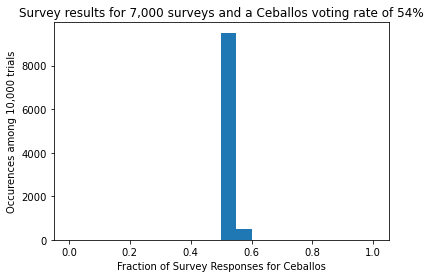

In [8]:
plt.hist(large_survey, bins = 20, range = (0,1))
plt.xlabel("Fraction of Survey Responses for Ceballos")
plt.ylabel("Occurences among 10,000 trials")
plt.title("Survey results for 7,000 surveys and a Ceballos voting rate of 54%")
plt.show()